## Artificial Intelligence: Informed Search

*Prepared by:*  
**Jude Michael Teves**  
Faculty, Software Technology Department  
College of Computer Studies - De La Salle University

## Import Libraries

We will be using `networkx` library for dealing with graph data. To install it, use the following command:

In [ ]:
# !pip install networkx

In [41]:
import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme()
# sns.set_style('darkgrid')

## Creating the network: Romania Problem

In [72]:
romania_cost = dict(
    Arad=dict(Zerind=dict(weight=75), Sibiu=dict(weight=140), Timisoara=dict(weight=118)),
    Bucharest=dict(Urziceni=dict(weight=85), Pitesti=dict(weight=101), Giurgiu=dict(weight=90), Fagaras=dict(weight=211)),
    Craiova=dict(Drobeta=dict(weight=120), Rimnicu=dict(weight=146), Pitesti=dict(weight=138)),
    Drobeta=dict(Mehadia=dict(weight=75)),
    Eforie=dict(Hirsova=dict(weight=86)),
    Fagaras=dict(Sibiu=dict(weight=99)),
    Hirsova=dict(Urziceni=dict(weight=98)),
    Iasi=dict(Vaslui=dict(weight=92), Neamt=dict(weight=87)),
    Lugoj=dict(Timisoara=dict(weight=111), Mehadia=dict(weight=70)),
    Oradea=dict(Zerind=dict(weight=71), Sibiu=dict(weight=151)),
    Pitesti=dict(Rimnicu=dict(weight=97)),
    Rimnicu=dict(Sibiu=dict(weight=80)),
    Urziceni=dict(Vaslui=dict(weight=142))
)

romania_pos = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531)
)

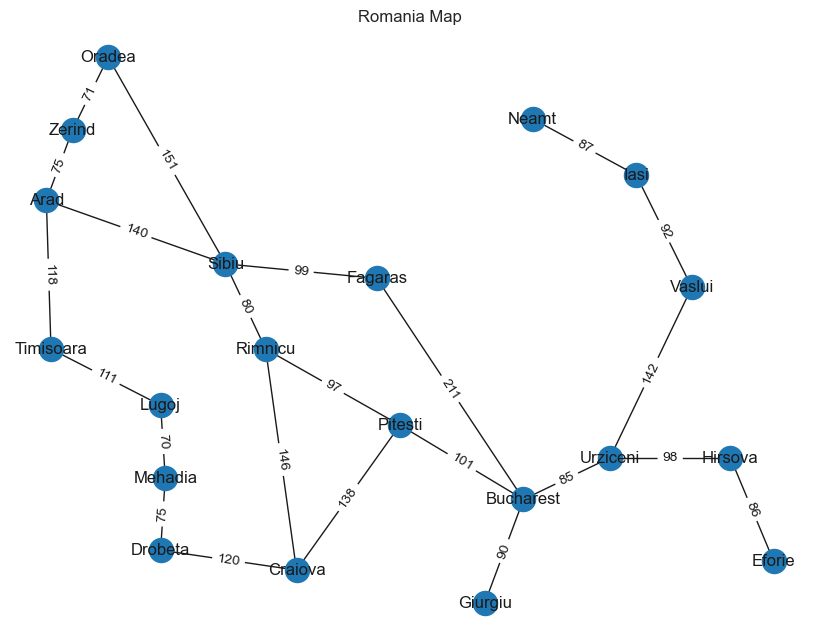

In [73]:
plt.figure(figsize=(8,6), dpi=100)

G = nx.Graph(romania_cost, )
nx.draw(G, romania_pos, with_labels=True)
cost = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, romania_pos, edge_labels=cost)
plt.title("Romania Map")
plt.show()

### Uninformed Search: Uniform Cost/Djisktra

In [74]:
nx.shortest_path(G, source='Arad', target='Bucharest', weight='weight')

['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']

In [76]:
nx.shortest_path_length(G, source='Arad', target='Bucharest', weight='weight')

418

### Informed Search: A*

In [83]:
def euclidean_distance(source, target):
    (x1, y1) = romania_pos[source]
    (x2, y2) = romania_pos[target]
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** (1/2)

nx.astar_path(G, source='Arad', target='Bucharest', weight='weight', heuristic=euclidean_distance)

['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']

In [84]:
nx.astar_path_length(G, source='Arad', target='Bucharest', weight='weight', heuristic=euclidean_distance)

418

### Comparison

In [110]:
%%time
for i in range(int(1e4)):
    nx.shortest_path(G, source='Arad', target='Bucharest', weight='weight')

Wall time: 602 ms


In [111]:
%%time
for i in range(int(1e4)):
    nx.astar_path(G, source='Arad', target='Bucharest', weight='weight', heuristic=euclidean_distance)

Wall time: 671 ms


## End
<sup>made by **Jude Michael Teves**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> <href>judemichaelteves@gmail.com</href> or <href>jude.teves@dlsu.edu.ph</href></sup><br>
